In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and general info about data

The dataset contains information about properties up to 50 square meters in size in the Szczecin area, Poland. The research focuses on the local real estate market, divided by districts, building types, and aims to determine the future price using machine learning (ML).

First step is load and explore data for further analysis.

In [2]:
data = pd.read_excel('wyniki_ofert_otodom.xlsx')

In [3]:
data.head(10)

,Nr oferty w Otodom,Tytuł ogłoszenia,Cena,Cena za m²,Adres,Powierzchnia,Liczba Pokoi,Piętro,Czynsz,Forma własności,...,Rodzaj zabudowy,material,Okna,Winda,Media,Zabezpieczenia,Informacje dodatkowe,Opis,Potral,Link
0,NaN,"Piękne, gotowe do wejścia 2-pokojowe z widokiem",509000,10221.0,"ul. Rynkowa, Niebuszewo-Bolinko, Śródmieście, ...","49,8",2,> 10/11,638 zł,pełna własność,...,blok,wielka płyta,plastikowe,tak,brak informacji,brak informacji,brak informacji,"Przestronne, kompletnie wyposażone mieszkanie ...",otodom.pl,www.otodom.pl/pl/oferta/piekne-gotowe-do-wejsc...
1,NaN,Kawalerka Centrum E.Plater z pięknym widokiem,323000,11897.0,"ul. Emilii Plater, Drzetowo-Grabowo, Śródmieśc...","27,15",1,8/8,280 zł,pełna własność,...,apartamentowiec,inne,plastikowe,tak,"telewizja kablowa, internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofo...",piwnica,Sprzedam Kawalerkę z Nowej Inwestycji przy uli...,otodom.pl,www.otodom.pl/pl/oferta/kawalerka-centrum-e-pl...
2,NaN,Osiedle Magnolia. 2pokoje + TARAS 20m2,559000,11180.0,"ul. Sebastiana Klonowica, Zawadzkiego-Klonowic...",50,2,3/3,420 zł,pełna własność,...,apartamentowiec,cegła,drewniane,tak,brak informacji,"teren zamknięty, domofon / wideofon",brak informacji,Magnolia Park to jedno z największych i najpię...,otodom.pl,www.otodom.pl/pl/oferta/osiedle-magnolia-2poko...
3,NaN,Atrakcyjne dwupokojowe w ścisłym centrum.,449000,9517.0,"ul. Śląska, Centrum, Śródmieście, Szczecin, za...","47,18",2,3/3,350 zł,pełna własność,...,kamienica,cegła,brak informacji,nie,internet,brak informacji,brak informacji,Polecam atrakcyjne mieszkanie 2 pokojowe o pow...,otodom.pl,www.otodom.pl/pl/oferta/atrakcyjne-dwupokojowe...
4,NaN,"Kawalerka w nowym budownictwie, winda, balkon",399000,13553.0,"Centrum, Śródmieście, Szczecin, zachodniopomor...","29,44",1,3/4,Zapytaj,Zapytaj,...,apartamentowiec,cegła,brak informacji,tak,brak informacji,brak informacji,brak informacji,Oferta sprzedaży mieszkania o wysokim standar...,otodom.pl,www.otodom.pl/pl/oferta/kawalerka-w-nowym-budo...
5,NaN,Dwa pokoje oś. Kasztanowe,390000,7917.0,"Załom-Kasztanowe, Prawobrzeże, Szczecin, zacho...","49,26",2,2/4,550 zł,pełna własność,...,blok,wielka płyta,plastikowe,nie,brak informacji,domofon / wideofon,"piwnica, oddzielna kuchnia",Oferujemy Państwu dwupokojowe mieszkanie na sp...,otodom.pl,www.otodom.pl/pl/oferta/dwa-pokoje-os-kasztano...
6,NaN,Mieszkanie 2-pokojowe bezpośrednio,439000,9203.0,"ul. Edwarda Dembowskiego, Niebuszewo-Bolinko, ...","47,7",2,parter/4,550 zł,spółdzielcze wł. prawo do lokalu,...,blok,brak informacji,plastikowe,nie,"telewizja kablowa, internet",domofon / wideofon,"piwnica, oddzielna kuchnia",Sprzedam ładne przestronne spółdzielczo własno...,otodom.pl,www.otodom.pl/pl/oferta/mieszkanie-2-pokojowe-...
7,NaN,Kolorowych domów | mieszkanie 1-pok. | M42,249999,9509.0,"ul. Kolorowych Domów, Bukowe-Klêskowo, Prawobr...","26,29",1,4/4,Zapytaj,pełna własność,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Przedmiotem ogłoszenia jest 1-pokojowe mieszka...,otodom.pl,www.otodom.pl/pl/oferta/kolorowych-domow-miesz...
8,NaN,Nowość na rynku / Mieszkania Inwestycyjne,285000,9437.0,"ul. Małe Błonia, Żelechowa, Północ, Szczecin, ...","30,2",2,2/2,Zapytaj,pełna własność,...,apartamentowiec,silikat,plastikowe,nie,"telewizja kablowa, internet, telefon","teren zamknięty, domofon / wideofon",brak informacji,Atrakcyjne lokale mieszkalne w topowej lokaliz...,otodom.pl,www.otodom.pl/pl/oferta/nowosc-na-rynku-mieszk...
9,NaN,HIT NA RYNKU od LiderHouse Deweloper,340000,10000.0,"Pomorzany, Zachód, Szczecin, zachodniopomorskie",34,2,1/2,Zapytaj,pełna własność,...,apartamentowiec,silikat,plastikowe,nie,"telewizja kablowa, internet, telefon",brak informacji,brak informacji,HIT NA RYNKU / MIESZKANIA INWESTYCYJNE. Kolejn...,otodom.pl,www.otodom.pl/pl/oferta/hit-na-rynku-od-liderh...


In [4]:
data.shape

(1381, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nr oferty w Otodom      0 non-null      float64
 1   Tytuł ogłoszenia        1377 non-null   object 
 2   Cena                    1377 non-null   object 
 3   Cena za m²              850 non-null    float64
 4   Adres                   1376 non-null   object 
 5   Powierzchnia            1374 non-null   object 
 6   Liczba Pokoi            1377 non-null   object 
 7   Piętro                  1377 non-null   object 
 8   Czynsz                  1377 non-null   object 
 9   Forma własności         1377 non-null   object 
 10  Stan wykończenia        1375 non-null   object 
 11  Balkon / ogród / taras  1374 non-null   object 
 12  Ogrzewanie              1377 non-null   object 
 13  Rynek                   1224 non-null   object 
 14  Typ ogloszeniodawcy     1221 non-null   

In [6]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Zliczenia wartości w kolumnie '{column}':\n{value_counts}\n")

Zliczenia wartości w kolumnie 'Nr oferty w Otodom':
Series([], Name: Nr oferty w Otodom, dtype: int64)

Zliczenia wartości w kolumnie 'Tytuł ogłoszenia':
Mały miejski apartament w prestiżowym projekcie      16
Gardenia Pogodno | Mieszkanie 2-pokojowe             13
Mieszkania nad Odrą przy Bulwarach Szczecińskich     12
Dwa pokoje, parter, taras, Bukowe, przy puszczy       9
Dwupokojowe mieszkanie w centrum Szczecina            8
                                                     ..
Emilii Plater 7 - A1.8.13                             1
Ciche mieszkanie w centrum Szczecina                  1
Racławicka Park | nowe mieszkanie M9b                 1
Apartament jednopokojowy z balkonem na Gumieńcach     1
Emilii Plater 7 - A2.1.11                             1
Name: Tytuł ogłoszenia, Length: 1140, dtype: int64

Zliczenia wartości w kolumnie 'Cena':
Zapytajocenę    527
299000           28
399000           19
389000           19
499000           16
               ... 
319770            1


In [7]:
data.isnull().sum()

Nr oferty w Otodom        1381
Tytuł ogłoszenia             4
Cena                         4
Cena za m²                 531
Adres                        5
Powierzchnia                 7
Liczba Pokoi                 4
Piętro                       4
Czynsz                       4
Forma własności              4
Stan wykończenia             6
Balkon / ogród / taras       7
Ogrzewanie                   4
Rynek                      157
Typ ogloszeniodawcy        160
Rok budowy                 158
Rodzaj zabudowy            157
material                   159
Okna                       158
Winda                      160
Media                      160
Zabezpieczenia             160
Informacje dodatkowe       160
Opis                         4
Potral                       0
Link                         0
dtype: int64

In [8]:
data =  data.drop(['Link','Potral','Nr oferty w Otodom'], axis = 1)

## "Adres" column 

1.Checking values in column
2.Split information to seperate columns:"street", "district","City"


In [9]:
data['Adres'].values

array(['ul. Rynkowa, Niebuszewo-Bolinko, Śródmieście, Szczecin, zachodniopomorskie',
       'ul. Emilii Plater, Drzetowo-Grabowo, Śródmieście, Szczecin, zachodniopomorskie',
       'ul. Sebastiana Klonowica, Zawadzkiego-Klonowica, Zachód, Szczecin, zachodniopomorskie',
       ..., 'Ostoja, Kołbaskowo, policki, zachodniopomorskie',
       'Ostoja, Kołbaskowo, policki, zachodniopomorskie',
       'Warzymice, Kołbaskowo, policki, zachodniopomorskie'], dtype=object)

In [10]:
data[['Ulica', 'Dzielnica', 'Miasto']] = data['Adres'].str.split(', ', expand=True, n=2)

In [11]:
data.columns

Index(['Tytuł ogłoszenia', 'Cena', 'Cena za m²', 'Adres', 'Powierzchnia',
       'Liczba Pokoi', 'Piętro', 'Czynsz', 'Forma własności',
       'Stan wykończenia', 'Balkon / ogród / taras', 'Ogrzewanie', 'Rynek',
       'Typ ogloszeniodawcy', 'Rok budowy', 'Rodzaj zabudowy', 'material',
       'Okna', 'Winda', 'Media', 'Zabezpieczenia', 'Informacje dodatkowe',
       'Opis', 'Ulica', 'Dzielnica', 'Miasto'],
      dtype='object')

In [12]:
data['Ulica'].values

array(['ul. Rynkowa', 'ul. Emilii Plater', 'ul. Sebastiana Klonowica',
       ..., 'Ostoja', 'Ostoja', 'Warzymice'], dtype=object)

In [13]:
data['Dzielnica'].values

array(['Niebuszewo-Bolinko', 'Drzetowo-Grabowo', 'Zawadzkiego-Klonowica',
       ..., 'Kołbaskowo', 'Kołbaskowo', 'Kołbaskowo'], dtype=object)

## Advertiser type column

1.Checking values
2.Replace superfluous information
3.Count values



In [14]:
data['Typ ogloszeniodawcy']

0                   Typ ogłoszeniodawcyprywatny
1                   Typ ogłoszeniodawcyprywatny
2                   Typ ogłoszeniodawcyprywatny
3       Typ ogłoszeniodawcybiuro nieruchomości 
4       Typ ogłoszeniodawcybiuro nieruchomości 
                         ...                   
1376    Typ ogłoszeniodawcybiuro nieruchomości 
1377    Typ ogłoszeniodawcybiuro nieruchomości 
1378    Typ ogłoszeniodawcybiuro nieruchomości 
1379    Typ ogłoszeniodawcybiuro nieruchomości 
1380    Typ ogłoszeniodawcybiuro nieruchomości 
Name: Typ ogloszeniodawcy, Length: 1381, dtype: object

In [15]:
data['Typ ogloszeniodawcy']= data['Typ ogloszeniodawcy'].str.replace('Typ ogłoszeniodawcy', '').str.strip()

In [16]:
data['Typ ogloszeniodawcy']

0                  prywatny
1                  prywatny
2                  prywatny
3       biuro nieruchomości
4       biuro nieruchomości
               ...         
1376    biuro nieruchomości
1377    biuro nieruchomości
1378    biuro nieruchomości
1379    biuro nieruchomości
1380    biuro nieruchomości
Name: Typ ogloszeniodawcy, Length: 1381, dtype: object

In [17]:
data['Typ ogloszeniodawcy'].value_counts()

biuro nieruchomości    605
deweloper              436
prywatny               180
Name: Typ ogloszeniodawcy, dtype: int64

## Price column

1.Check type 
2.Modify column to change to float type

In [18]:
data['Cena'].dtype


dtype('O')

In [19]:
data['Cena'].str.replace(",",".").str.strip()

0       509000
1       323000
2       559000
3       449000
4       399000
         ...  
1376    350000
1377    530000
1378    399900
1379    530000
1380    385000
Name: Cena, Length: 1381, dtype: object

In [20]:
data['Cena'] = data['Cena'].replace('', np.nan)

In [21]:
data['Cena'] = data['Cena'].replace('Zapytajocenę', np.nan)

In [22]:
data['Cena'] = data['Cena'].astype(float)

## Area column


In [23]:
data['Powierzchnia'].value_counts()

41        103
44         59
40         53
48         35
46         33
         ... 
31,62       1
45,23       1
44,08       1
46,14       1
26,79       1
Name: Powierzchnia, Length: 468, dtype: int64

In [24]:
 data['Powierzchnia'] = data['Powierzchnia'].str.replace(",",".").str.strip()

In [25]:
 data['Powierzchnia'] = data['Powierzchnia'].str.replace(r'\s+', '', regex=True)

In [26]:
data['Powierzchnia'] = data['Powierzchnia'].astype(float)

## Number of rooms

In [27]:
data['Liczba Pokoi'].value_counts()

2     879
1     440
3      54
:2      2
9       1
:1      1
Name: Liczba Pokoi, dtype: int64

In [28]:
data['Liczba Pokoi'].dtype

dtype('O')

In [29]:
data['Liczba Pokoi'] = data['Liczba Pokoi'].replace(':', '')


In [30]:
data['Liczba Pokoi'] = data['Liczba Pokoi'].replace(':2','2')

In [31]:
data['Liczba Pokoi'] = data['Liczba Pokoi'].replace(':1','1')

In [32]:
data['Liczba Pokoi'] = data['Liczba Pokoi'].astype(float)

## Floor

In [33]:
data['Piętro'].value_counts()

4/4         92
1/2         77
parter/4    64
2/4         64
3/3         62
            ..
5/4          1
6/28         1
> 10/28      1
10/10        1
:parter      1
Name: Piętro, Length: 107, dtype: int64

In [34]:
data['Piętro'] = data['Piętro'].replace('< ', '').str.strip()


In [35]:
data['Piętro'] = data['Piętro'].str.replace('> ', '').str.strip()


In [36]:
data['Piętro'] = data['Piętro'].str.replace('parter', '0').str.strip()



In [37]:
data['Piętro'] = data['Piętro'].str.replace(':parter', '0').str.strip()
data['Piętro'] = data['Piętro'].str.replace(':2', '2').str.strip()
data['Piętro'] = data['Piętro'].str.replace(':0', '0').str.strip()
data['Piętro'] = data['Piętro'].str.replace(':4', '4').str.strip()

In [38]:
data['Piętro'] = data['Piętro'].str.replace('Zapytaj','').str.strip()


In [39]:
data['Piętro'] = data['Piętro'].str.replace('suterena', '-1').str.strip()

In [40]:
data['Piętro'] = data['Piętro'].replace('', np.nan)

In [41]:
data['Piętro'] = data['Piętro'].replace('poddasze', np.nan)

In [42]:
data[['Pietro', 'Ilosc_Pieter']] = data['Piętro'].str.split('/', expand=True)

In [43]:
data['Pietro'].value_counts()

1           258
2           251
0           210
3           199
4           171
5            62
7            60
6            55
8            35
10           29
9            23
poddasze      5
-1            1
Name: Pietro, dtype: int64

In [44]:
data['Pietro'] = data['Pietro'].replace('poddasze', np.nan)

In [45]:
data['Pietro'].value_counts()

1     258
2     251
0     210
3     199
4     171
5      62
7      60
6      55
8      35
10     29
9      23
-1      1
Name: Pietro, dtype: int64

In [46]:
data['Pietro'] = data['Pietro'].astype(float)


In [47]:
data['Pietro']

0       10.0
1        8.0
2        3.0
3        3.0
4        3.0
        ... 
1376     0.0
1377     4.0
1378     3.0
1379     4.0
1380     0.0
Name: Pietro, Length: 1381, dtype: float64

## Number of floors

In [48]:
data['Ilosc_Pieter'] = data['Ilosc_Pieter'].astype(float)

In [49]:
data['Ilosc_Pieter'].dtype

dtype('float64')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytuł ogłoszenia        1377 non-null   object 
 1   Cena                    850 non-null    float64
 2   Cena za m²              850 non-null    float64
 3   Adres                   1376 non-null   object 
 4   Powierzchnia            1374 non-null   float64
 5   Liczba Pokoi            1377 non-null   float64
 6   Piętro                  1359 non-null   object 
 7   Czynsz                  1377 non-null   object 
 8   Forma własności         1377 non-null   object 
 9   Stan wykończenia        1375 non-null   object 
 10  Balkon / ogród / taras  1374 non-null   object 
 11  Ogrzewanie              1377 non-null   object 
 12  Rynek                   1224 non-null   object 
 13  Typ ogloszeniodawcy     1221 non-null   object 
 14  Rok budowy              1223 non-null   

In [51]:
# Kolejne kroki 
#usunąć kolemne Piętro , oraz portal
#przyjrzeć sie kolumnie czynsz, stan wykończenia, balkon/taras/ , rynek, rok budowy, materiał, okna, winda, Media
#zabiezpieczenia, info.dodtakowe, 

#dodać kolumnę cena po negocjacjach tj. cena - 10% 15% , przeliczyc na cenę za metr
#Zmienić kolejnośc kolumn , i zapisać jako nowy excel po zmianch 

#zrobić kilka wykresów przeglądajacych  , w dużej mierze grupowania, średnie ceny itp zapisać 

#pozamieniać kolumny kolumny na typ numeryczny np przy oknach 1 - drewniane 2 - plastikowe
#usunać zbędne kolumny do ML 
#zrobić dummies

#modelowanie danych (przykłady z projektu)

#zbadanie korelacji, heatmap,pairplot
#zakres wartości 
#zbadanie IQR, outlinerów dla np ceny ceny za metr
#ttest (wiecej info z projektu)



#Modele regresji? każdy model , AUCROC , sprawdzanie dokładności modeli 
#sprawdzenie jak sprawdza się na modelach klasyfikacji 

#zastosowanie modelu na danych i dodanie kolumny z przewidywaną ceną 



In [52]:
data = data.drop(['Nr oferty w Otodom','Piętro','Potral','Adres'], axis=1)

KeyError: "['Nr oferty w Otodom' 'Potral'] not found in axis"

## Rent 

In [53]:
data['Czynsz'] = data['Czynsz'].str.replace(' zł', '', regex=True)
data['Czynsz'] = data['Czynsz'].replace('Zapytaj', np.nan, regex=True)
data['Czynsz'] = data['Czynsz'].str.replace(',', '.', regex=True)
data['Czynsz'] = data['Czynsz'].str.replace(':', '', regex=True)

In [54]:
data['Czynsz'].value_counts()

400     64
200     43
450     40
300     33
500     25
        ..
148      1
680      1
647      1
3.80     1
685      1
Name: Czynsz, Length: 142, dtype: int64

In [55]:
data['Czynsz'] = data['Czynsz'].astype(float)

In [56]:
data['Czynsz'].dtype

dtype('float64')

## Stan wykonczenia

In [57]:
data['Stan wykończenia']

0       do zamieszkania
1        do wykończenia
2       do zamieszkania
3       do zamieszkania
4       do zamieszkania
             ...       
1376    do zamieszkania
1377    do zamieszkania
1378            Zapytaj
1379    do zamieszkania
1380    do zamieszkania
Name: Stan wykończenia, Length: 1381, dtype: object

In [58]:
data['Stan_wykonczenia'] = data['Stan wykończenia'].str.replace('Zapytaj','', regex = True)

## Balkon


In [59]:
data['Balkon / ogród / taras']

0              balkon
1             Zapytaj
2       balkon, taras
3             Zapytaj
4              balkon
            ...      
1376          ogródek
1377           balkon
1378           balkon
1379    balkon, taras
1380           balkon
Name: Balkon / ogród / taras, Length: 1381, dtype: object

In [60]:
data['Balkon/ogrod'] = data['Balkon / ogród / taras'].str.replace('Zapytaj','', regex = True)

## Market

In [61]:
data['Rynek']

0          wtórny
1       pierwotny
2          wtórny
3          wtórny
4          wtórny
          ...    
1376       wtórny
1377       wtórny
1378       wtórny
1379       wtórny
1380       wtórny
Name: Rynek, Length: 1381, dtype: object

In [62]:
data['Rynek'].value_counts()

pierwotny    613
wtórny       608
:wtórny        3
Name: Rynek, dtype: int64

In [63]:
data['Rynek'] = data['Rynek'].str.replace(':','', regex = True)

In [64]:
data['Rynek'].value_counts()

pierwotny    613
wtórny       611
Name: Rynek, dtype: int64

## Rok budowy

In [65]:
data['Rok budowy']= data['Rok budowy'].replace('brak informacji',np.nan, regex = True)
data['Rok budowy']= data['Rok budowy'].str.replace(':','', regex = True)

In [66]:
data['Rok_budowy'].astype(float)

KeyError: 'Rok_budowy'

In [67]:
data.rename(columns={'Rok budowy': 'Rok_budowy'}, inplace=True)

## Type of building

In [68]:
data['Rodzaj zabudowy'].value_counts()

blok                545
brak informacji     352
kamienica           163
apartamentowiec     146
dom wolnostojący     15
:kamienica            2
:blok                 1
Name: Rodzaj zabudowy, dtype: int64

In [69]:
data['Rodzaj_zabudowy'] = data['Rodzaj zabudowy'].str.replace(':','',regex = True)

In [70]:
data['Rodzaj_zabudowy'].value_counts()

blok                546
brak informacji     352
kamienica           165
apartamentowiec     146
dom wolnostojący     15
Name: Rodzaj_zabudowy, dtype: int64

## Material of building

In [71]:
data['material'].value_counts()

brak informacji    612
cegła              291
silikat            144
wielka płyta       114
inne                33
żelbet               9
pustak               7
beton                5
beton komórkowy      4
drewno               2
:cegła               1
Name: material, dtype: int64

In [72]:
data['material'] = data['material'].str.replace(':','',regex = True)

In [73]:
data['material'].value_counts()

brak informacji    612
cegła              292
silikat            144
wielka płyta       114
inne                33
żelbet               9
pustak               7
beton                5
beton komórkowy      4
drewno               2
Name: material, dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytuł ogłoszenia        1377 non-null   object 
 1   Cena                    850 non-null    float64
 2   Cena za m²              850 non-null    float64
 3   Adres                   1376 non-null   object 
 4   Powierzchnia            1374 non-null   float64
 5   Liczba Pokoi            1377 non-null   float64
 6   Piętro                  1359 non-null   object 
 7   Czynsz                  633 non-null    float64
 8   Forma własności         1377 non-null   object 
 9   Stan wykończenia        1375 non-null   object 
 10  Balkon / ogród / taras  1374 non-null   object 
 11  Ogrzewanie              1377 non-null   object 
 12  Rynek                   1224 non-null   object 
 13  Typ ogloszeniodawcy     1221 non-null   object 
 14  Rok_budowy              1052 non-null   

## Type of heating

In [75]:
data['Ogrzewanie'].value_counts()

miejskie         800
Zapytaj          351
gazowe           169
elektryczne       28
kotłownia         11
inne              10
piece kaflowe      5
:gazowe            1
:elektryczne       1
:miejskie          1
Name: Ogrzewanie, dtype: int64

In [76]:
data['Ogrzewanie'] = data['Ogrzewanie'].str.replace(':','', regex = True)

In [77]:
data['Ogrzewanie'].value_counts()

miejskie         801
Zapytaj          351
gazowe           170
elektryczne       29
kotłownia         11
inne              10
piece kaflowe      5
Name: Ogrzewanie, dtype: int64

In [78]:
data['Dzielnica'].value_counts()

Drzetowo-Grabowo                276
Śródmieście                     221
Zachód                          109
Pomorzany                       108
Śródmieście-Północ               84
Zawadzkiego-Klonowica            64
Północ                           62
Stołczyn                         40
Dąbie                            40
Centrum                          38
Prawobrzeże                      36
Bukowe-Klêskowo                  35
Gumieńce                         33
Żelechowa                        30
Niebuszewo-Bolinko               25
Kołbaskowo                       25
Police                           17
Pogodno                          16
Łasztownia                       15
Bukowo                           13
Świerczewo                       11
Osów                              8
Nowe Miasto                       8
Turzyn                            7
Arkońskie-Niemierzyn              7
Zdroje                            6
Stare Miasto                      6
Śródmieście-Zachód          

In [79]:
data = data.drop(['Balkon / ogród / taras','Stan wykończenia','Stan wykończenia','Rodzaj zabudowy'],axis=1)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tytuł ogłoszenia      1377 non-null   object 
 1   Cena                  850 non-null    float64
 2   Cena za m²            850 non-null    float64
 3   Adres                 1376 non-null   object 
 4   Powierzchnia          1374 non-null   float64
 5   Liczba Pokoi          1377 non-null   float64
 6   Piętro                1359 non-null   object 
 7   Czynsz                633 non-null    float64
 8   Forma własności       1377 non-null   object 
 9   Ogrzewanie            1377 non-null   object 
 10  Rynek                 1224 non-null   object 
 11  Typ ogloszeniodawcy   1221 non-null   object 
 12  Rok_budowy            1052 non-null   object 
 13  material              1222 non-null   object 
 14  Okna                  1223 non-null   object 
 15  Winda                

In [81]:
data['Cena-10%'] = data['Cena'] * 0.9

In [82]:
data['Cena-15%'] = data['Cena'] * 0.85

In [83]:
data['Cena_za_metr-10%'] = data['Cena za m²'] * 0.9

In [84]:
data['Cena_za_metr-15%'] = data['Cena za m²'] * 0.85

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tytuł ogłoszenia      1377 non-null   object 
 1   Cena                  850 non-null    float64
 2   Cena za m²            850 non-null    float64
 3   Adres                 1376 non-null   object 
 4   Powierzchnia          1374 non-null   float64
 5   Liczba Pokoi          1377 non-null   float64
 6   Piętro                1359 non-null   object 
 7   Czynsz                633 non-null    float64
 8   Forma własności       1377 non-null   object 
 9   Ogrzewanie            1377 non-null   object 
 10  Rynek                 1224 non-null   object 
 11  Typ ogloszeniodawcy   1221 non-null   object 
 12  Rok_budowy            1052 non-null   object 
 13  material              1222 non-null   object 
 14  Okna                  1223 non-null   object 
 15  Winda                

In [86]:
data_order = ['Tytuł ogłoszenia','Cena','Cena-10%','Cena-15%','Cena za m²','Cena_za_metr-10%','Cena_za_metr-15%','Powierzchnia',
             'Liczba Pokoi','Pietro','Ilosc_Pieter','Stan_wykonczenia','Rodzaj_zabudowy','Ulica','Dzielnica','Miasto','Rok_budowy','Rynek','Typ ogloszeniodawcy',
             'Forma własności','Czynsz','material', 'Okna', 'Winda','Media','Zabezpieczenia','Informacje dodatkowe',
             'Stan_wykonczenia','Balkon/ogrod','Opis']

In [121]:
data.to_excel('dane.xlsx', index=False)

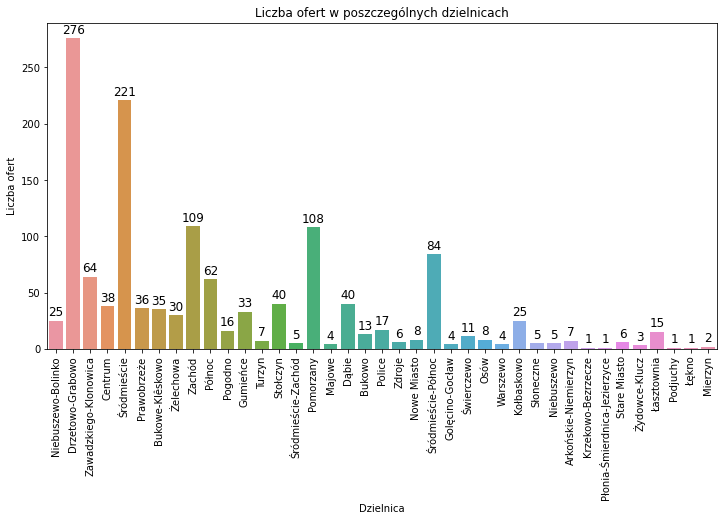

In [87]:
# Tworzymy wykres
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Dzielnica')
plt.xticks(rotation=90)  # Obracamy etykiety osi X, aby były czytelne

# Dodajemy etykiety z liczbą nad słupkami
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Dodajemy etykiety
plt.title("Liczba ofert w poszczególnych dzielnicach")
plt.xlabel("Dzielnica")
plt.ylabel("Liczba ofert")

# Wyświetlamy wykres
plt.show()

In [88]:
agregacje = ({
    'Cena': ['mean', 'max', 'min'],
    'Powierzchnia': ['mean', 'max', 'min'],
    'Cena za m²':['mean', 'max', 'min']
    
})

data_agg = data.groupby('Dzielnica').agg(agregacje).reset_index()

In [89]:
data_agg.round(2)

Dzielnica       Cena                      Powierzchnia  \
                                       mean        max       min         mean   
0           Arkońskie-Niemierzyn  367632.57  463000.00  293611.0        41.74   
1                Bukowe-Klêskowo  315970.89  394000.00  249999.0        29.86   
2                         Bukowo  328443.23  385164.00  292463.0        39.79   
3                        Centrum  416536.84  990000.00  245000.0        36.80   
4               Drzetowo-Grabowo  365940.45  573207.45  207000.0        42.04   
5                          Dąbie  363137.60  523688.00  239000.0        37.92   
6                Golęcino-Gocław  260500.00  330000.00  193000.0        40.95   
7                       Gumieńce  398225.21  620000.00  266377.0        37.67   
8                     Kołbaskowo  446462.72  584000.00  329384.0        37.00   
9             Krzekowo-Bezrzecze  365000.00  365000.00  365000.0        34.65   
10                        Majowe  430750.00  499000.00  339000.0        46.34   
11                       Mierzyn  350000.00  350000.00  350000.0        39.00   
12                    Niebuszewo  395500.00  435000.00  320000.0        45.63   
13            Niebuszewo-Bolinko  367018.40  509000.00  220000.0        39.61   
14                   Nowe Miasto  370862.50  569000.00  289000.0        36.92   
15                          Osów  335145.12  355000.00  293611.0        34.92   
16                      Podjuchy  231000.00  231000.00  231000.0        22.10   
17                       Pogodno  368250.00  520000.00  254000.0        42.25   
18                        Police  334642.12  389000.00  265000.0        42.43   
19                     Pomorzany  394454.55  650000.00  275000.0        34.50   
20                   Prawobrzeże  411033.78  556554.00  199000.0        43.14   
21                        Północ  361530.97  640000.00  230000.0        40.55   
22  Płonia-Śmierdnica-Jezierzyce  345500.00  345500.00  345500.0        31.00   
23                  Stare Miasto  445400.00  495000.00  421400.0        42.83   
24                      Stołczyn  372655.09  540000.00  265900.0        42.56   
25                     Słoneczne  316800.00  379000.00  290000.0        35.02   
26                        Turzyn  272285.71  355000.00   95000.0        33.42   
27                      Warszewo  458267.50  462550.00  455260.0        44.82   
28                        Zachód  402335.89  641520.00  158916.0        40.37   
29         Zawadzkiego-Klonowica  446416.67  559000.00  291000.0        39.77   
30                        Zdroje  419833.33  495000.00  389000.0        48.02   
31                    Łasztownia  477192.30  593000.00  239000.0        36.54   
32                         Łękno  159000.00  159000.00  159000.0        44.80   
33                   Śródmieście  413968.30  999000.00   95000.0        38.05   
34            Śródmieście-Północ  537736.79  849000.00  239000.0        43.02   
35            Śródmieście-Zachód  313800.00  487000.00  239000.0        38.14   
36                    Świerczewo  470363.64  620000.00  351000.0        41.31   
37                     Żelechowa  355849.88  495000.00  285000.0        38.66   
38                 Żydowce-Klucz  257666.67  307000.00  159000.0        34.93   

                 Cena za m²                    
      max    min       mean      max      min  
0   47.80  32.99    8825.43   9686.0   8038.0  
1   49.40  26.29   10518.91  12468.0   7672.0  
2   49.38  32.00    8294.69   9531.0   7800.0  
3   48.48  24.44   11619.82  23336.0   5948.0  
4   50.00  21.00    9871.19  12335.0   6285.0  
5   49.70  26.98    8930.60  12100.0   6459.0  
6   47.91  33.14    6473.00   9022.0   4991.0  
7   48.00  25.87   10489.94  13863.0   8500.0  
8   48.67  28.42   12156.20  14071.0   8800.0  
9   34.65  34.65   10534.00  10534.0  10534.0  
10  49.42  37.75    9278.00  10184.0   8903.0  
11  39.00  39.00    8974.00   8974.0   8974.0  
12  48.00  38.88    8652.80  

In [90]:
data_agg =  data_agg.sort_values(by=('Cena','mean'), ascending=True)
data_agg

Dzielnica           Cena                       \
                                           mean        max       min   
32                         Łękno  159000.000000  159000.00  159000.0   
16                      Podjuchy  231000.000000  231000.00  231000.0   
38                 Żydowce-Klucz  257666.666667  307000.00  159000.0   
6                Golęcino-Gocław  260500.000000  330000.00  193000.0   
26                        Turzyn  272285.714286  355000.00   95000.0   
35            Śródmieście-Zachód  313800.000000  487000.00  239000.0   
1                Bukowe-Klêskowo  315970.885714  394000.00  249999.0   
25                     Słoneczne  316800.000000  379000.00  290000.0   
2                         Bukowo  328443.230769  385164.00  292463.0   
18                        Police  334642.117647  389000.00  265000.0   
15                          Osów  335145.125000  355000.00  293611.0   
22  Płonia-Śmierdnica-Jezierzyce  345500.000000  345500.00  345500.0   
11                       Mierzyn  350000.000000  350000.00  350000.0   
37                     Żelechowa  355849.884615  495000.00  285000.0   
21                        Północ  361530.967742  640000.00  230000.0   
5                          Dąbie  363137.600000  523688.00  239000.0   
9             Krzekowo-Bezrzecze  365000.000000  365000.00  365000.0   
4               Drzetowo-Grabowo  365940.450000  573207.45  207000.0   
13            Niebuszewo-Bolinko  367018.400000  509000.00  220000.0   
0           Arkońskie-Niemierzyn  367632.571429  463000.00  293611.0   
17                       Pogodno  368250.000000  520000.00  254000.0   
14                   Nowe Miasto  370862.500000  569000.00  289000.0   
24                      Stołczyn  372655.090909  540000.00  265900.0   
19                     Pomorzany  394454.545455  650000.00  275000.0   
12                    Niebuszewo  395500.000000  435000.00  320000.0   
7                       Gumieńce  398225.212121  620000.00  266377.0   
28                        Zachód  402335.886789  641520.00  158916.0   
20                   Prawobrzeże  411033.777778  556554.00  199000.0   
33                   Śródmieście  413968.296425  999000.00   95000.0   
3                        Centrum  416536.842105  990000.00  245000.0   
30                        Zdroje  419833.333333  495000.00  389000.0   
10                        Majowe  430750.000000  499000.00  339000.0   
23                  Stare Miasto  445400.000000  495000.00  421400.0   
29         Zawadzkiego-Klonowica  446416.666667  559000.00  291000.0   
8                     Kołbaskowo  446462.720000  584000.00  329384.0   
27                      Warszewo  458267.500000  462550.00  455260.0   
36                    Świerczewo  470363.636364  620000.00  351000.0   
31                    Łasztownia  477192.300000  593000.00  239000.0   
34            Śródmieście-Północ  537736.789474  849000.00  239000.0   

   Powierzchnia                  Cena za m²                    
           mean    max    min          mean      max      min  
32    44.800000  44.80  44.80   3549.000000   3549.0   3549.0  
16    22.100000  22.10  22.10  10452.000000  10452.0  10452.0  
38    34.933333  44.90  15.00   8091.333333  10600.0   6837.0  
6     40.950000  47.91  33.14   6473.000000   9022.0   4991.0  
26    33.423333  44.68  14.00   8051.142857  12565.0   5365.0  
35    38.138000  46.52  30.27   8185.200000  10469.0   6265.0  
1     29.860000  49.40  26.29  10518.914286  12468.0   7672.0  
25    35.020000  49.00  31.00   9198.800000  10226.0   7735.0  
2     39.794615  49.38  32.00   8294.692308   9531.0   7800.0  
18    42.434118  48.92  28.00   8005.882353   9464.0   6920.0  
15    34.923750  41.02  29.90   9705.750000  11873.0   8600.0  
22    31.000000  31.00  31.00  11145.000000  11145.0  11145.0  
11    39.000000  39.00  39.00   8974.000000   8974.0   8974.0  
37    38.663333  50.00  30.20   9438.230769  11834.0   7600.0  
21    40.551452  50.00  19.50   9018.564516  1

<ipython-input-91-7d006218b121>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(dzielnice, rotation=90, ha='right')
<ipython-input-91-7d006218b121>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(dzielnice, rotation=90, ha='right')
<ipython-input-91-7d006218b121>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(dzielnice, rotation=90, ha='right')


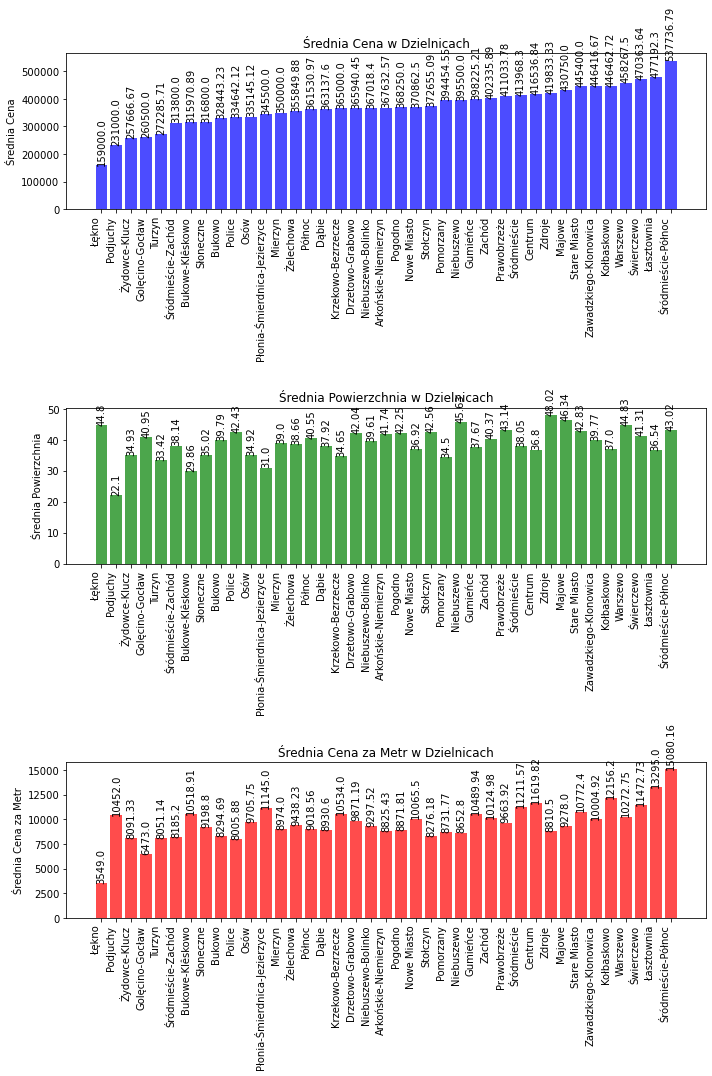

In [91]:
import matplotlib.pyplot as plt

# Tworzenie danych testowych
dzielnice = data_agg['Dzielnica']
srednia_cena = data_agg['Cena']['mean']
srednia_powierzchnia = data_agg['Powierzchnia']['mean']
srednia_cena_za_metr = data_agg['Cena za m²']['mean']

# Tworzenie trzech osobnych wykresów
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

# Wykres dla średniej ceny
ax1.bar(dzielnice, srednia_cena, color='b', alpha=0.7)
ax1.set_ylabel('Średnia Cena')
ax1.set_title('Średnia Cena w Dzielnicach')
ax1.set_xticklabels(dzielnice, rotation=90, ha='right')

# Wykres dla średniej powierzchni
ax2.bar(dzielnice, srednia_powierzchnia, color='g', alpha=0.7)
ax2.set_ylabel('Średnia Powierzchnia')
ax2.set_title('Średnia Powierzchnia w Dzielnicach')
ax2.set_xticklabels(dzielnice, rotation=90, ha='right')

# Wykres dla średniej ceny za metr
ax3.bar(dzielnice, srednia_cena_za_metr, color='r', alpha=0.7)
ax3.set_ylabel('Średnia Cena za Metr')
ax3.set_title('Średnia Cena za Metr w Dzielnicach')
ax3.set_xticklabels(dzielnice, rotation=90, ha='right')

for i, v in enumerate(srednia_cena):
    ax1.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=90)  # Obrót etykiety o 90 stopni
for i, v in enumerate(srednia_powierzchnia):
    ax2.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=90)  # Obrót etykiety o 90 stopni
for i, v in enumerate(srednia_cena_za_metr):
    ax3.text(i, v, str(round(v, 2)), ha='center', va='bottom', rotation=90)  # Obrót etykiety o 90 stopni

# Konfiguracja wykresów
plt.tight_layout()
plt.show()

In [93]:
data['Stan_wykonczenia'].value_counts()

do wykończenia      498
do zamieszkania     439
                    364
do remontu           73
:do zamieszkania      1
Name: Stan_wykonczenia, dtype: int64

In [105]:
# Tworzenie nowej ramki danych z danymi z kolumny "Dzielnica", "Stan_wykonczenia" i "Rodzaj_zabudowy"
new_data = data[['Dzielnica', 'Stan_wykonczenia', 'Rodzaj_zabudowy', 'Cena']]

# Grupowanie danych według "Dzielnica", "Stan_wykonczenia", "Rodzaj_zabudowy" oraz obliczanie średniej ceny i liczby ofert
grouped_data = new_data.groupby(['Dzielnica', 'Stan_wykonczenia', 'Rodzaj_zabudowy']).agg(
    Srednia_cena=('Cena', 'mean'),
    Liczba_ofert=('Cena', 'count')
).reset_index()

# Filtracja danych dla stanów "do remontu", "do wykończenia" i "do zamieszkania"
filtered_data = grouped_data[grouped_data['Stan_wykonczenia'].isin(['do remontu', 'do wykończenia', 'do zamieszkania'])]

df_porownanie = pd.DataFrame(filtered_data)
df_porownanie

,Dzielnica,Stan_wykonczenia,Rodzaj_zabudowy,Srednia_cena,Liczba_ofert
0,Arkońskie-Niemierzyn,do remontu,blok,383000.000000,1
1,Arkońskie-Niemierzyn,do zamieszkania,blok,431000.000000,2
2,Arkońskie-Niemierzyn,do zamieszkania,kamienica,332107.000000,4
3,Bukowe-Klêskowo,do remontu,blok,379000.000000,1
4,Bukowe-Klêskowo,do zamieszkania,blok,390666.666667,15
...,...,...,...,...,...
187,Żelechowa,do zamieszkania,apartamentowiec,495000.000000,1
188,Żelechowa,do zamieszkania,blok,322666.666667,3
189,Żelechowa,do zamieszkania,kamienica,380000.000000,4
190,Żydowce-Klucz,do wykończenia,blok,307000.000000,2


In [112]:
# Lista dzielnic do porównania
dzielnie_do_porownania = ["Dąbie",'Turzyn']

# Wybieranie danych tylko dla wybranych dzielnic
wybrane_dane = filtered_data[filtered_data['Dzielnica'].isin(dzielnie_do_porownania)]

wybrane_dane


,Dzielnica,Stan_wykonczenia,Rodzaj_zabudowy,Srednia_cena,Liczba_ofert
25,Dąbie,do wykończenia,apartamentowiec,523688.0,1
26,Dąbie,do wykończenia,blok,357000.0,2
27,Dąbie,do zamieszkania,blok,289000.0,2
125,Turzyn,do wykończenia,kamienica,329000.0,1
126,Turzyn,do zamieszkania,kamienica,289000.0,2


KeyError: 'Cena Max'

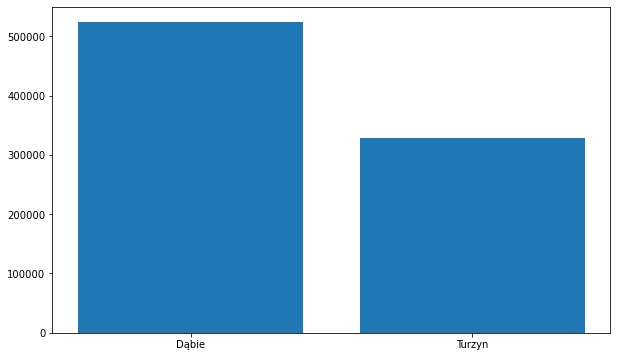

In [113]:
plt.figure(figsize=(10, 6))
plt.bar(wybrane_dane['Dzielnica'], wybrane_dane['Srednia_cena'], label='Średnia Cena')
plt.bar(wybrane_dane['Dzielnica'], wybrane_dane['Cena Max'], label='Cena Max', bottom=wybrane_dane['Srednia_cena'])
plt.bar(wybrane_dane['Dzielnica'], wybrane_dane['Cena Min'], label='Cena Min', bottom=wybrane_dane['Srednia_cena'] + wybrane_dane['Cena Max'])
plt.xlabel('Dzielnica')
plt.ylabel('Cena')
plt.title('Porównanie Cen w Wybranych Dzielnicach')
plt.xticks(rotation=45)
plt.legend()
plt.show()

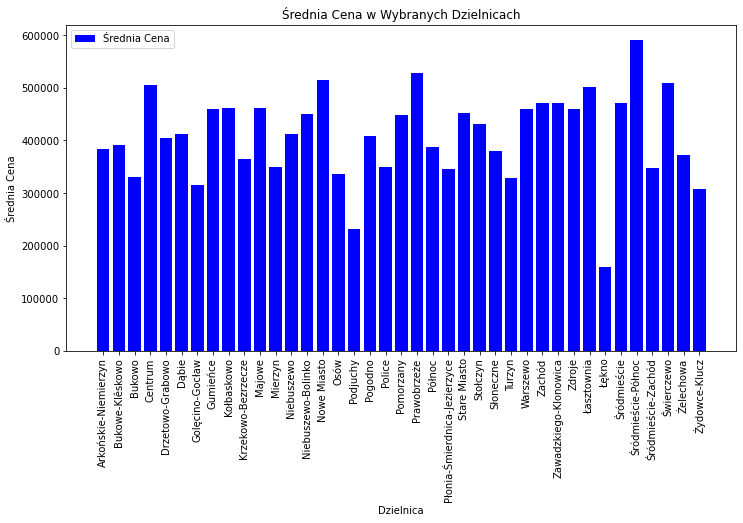

In [116]:
grouped_data = new_data.groupby(['Dzielnica', 'Stan_wykonczenia']).agg(
    Srednia_cena=('Cena', 'mean', )
).reset_index()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['Dzielnica'], grouped_data['Srednia_cena'], label='Średnia Cena', color='b')
plt.xlabel('Dzielnica')
plt.ylabel('Średnia Cena')
plt.title('Średnia Cena w Wybranych Dzielnicach')
plt.xticks(rotation=90)  # Obrócenie etykiet osi x
plt.legend()
plt.show()

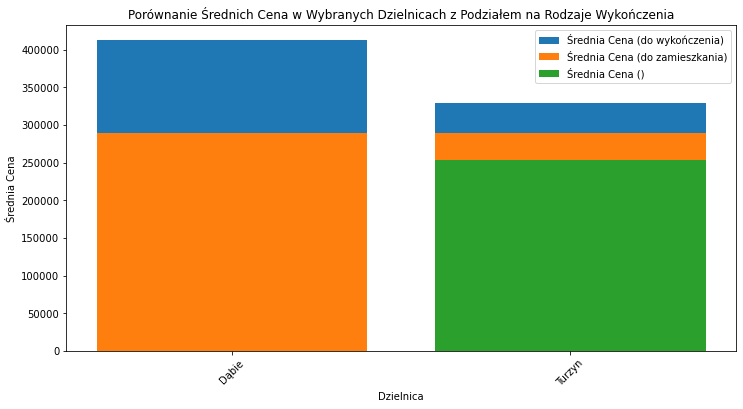

In [118]:
wybrane_dane = grouped_data[grouped_data['Dzielnica'].isin(dzielnie_do_porownania)]

# Tworzenie wykresu
plt.figure(figsize=(12, 6))

# Iteracja przez każdy rodzaj wykończenia
for stan_wykonczenia in wybrane_dane['Stan_wykonczenia'].unique():
    dane_stan = wybrane_dane[wybrane_dane['Stan_wykonczenia'] == stan_wykonczenia]
    plt.bar(dane_stan['Dzielnica'], dane_stan['Srednia_cena'], label=f'Średnia Cena ({stan_wykonczenia})')

plt.xlabel('Dzielnica')
plt.ylabel('Średnia Cena')
plt.title('Porównanie Średnich Cena w Wybranych Dzielnicach z Podziałem na Rodzaje Wykończenia')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Lista dzielnic do porównania
dzielnie_do_porownania = ["Dąbie",'Turzyn']

# Wybieranie danych tylko dla wybranych dzielnic
wybrane_dane = filtered_data[filtered_data['Dzielnica'].isin(dzielnie_do_porownania)]


# Tworzenie trzech osobnych wykresów
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Iteracja przez każdy rodzaj wykończenia
for i, stan_wykonczenia in enumerate(wybrane_dane['Stan_wykonczenia'].unique()):
    dane_stan = wybrane_dane[wybrane_dane['Stan_wykonczenia'] == stan_wykonczenia]
    
    # Wykres dla danego rodzaju wykończenia
    ax = axs[i]
    ax.bar(dane_stan['Dzielnica'], dane_stan['Srednia_cena'], label=f'Średnia Cena ({stan_wykonczenia})')
    ax.set_ylabel('Średnia Cena')
    ax.set_title(f'Porównanie Średnich Cena w Dzielnicach ({stan_wykonczenia})')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Ustawienie wspólnej etykiety osi x dla ostatniego wykresu
axs[-1].set_xlabel('Dzielnica')

# Konfiguracja wykresów
plt.tight_layout()
plt.show()